# Exploratory Data Analysis using Supermarket Sales Data in Python

The dataset consists of historical sales data of a supermarket company from 3 different branches over 3 months from Jan-March 2019. Following features provides a summary of the variables and the variable description.

### Features:

Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style= "darkgrid")

In [2]:
supermarket_data = pd.read_csv('supermarket_sales .csv')

In [3]:
supermarket_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
supermarket_data.shape

(1000, 17)

In [5]:
supermarket_data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
supermarket_data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


The count, mean, min and max rows are self-explanatory. The std shows the standard deviation, and the 25%, 50% and 75% rows show the corresponding percentiles.

In [7]:
supermarket_data.duplicated().sum()

0

By observing the data there are not any duplicated values.

In [8]:
supermarket_data.isnull()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
supermarket_data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

We have observed all the columns there not any null values. 

In [10]:
supermarket_data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

There are three types of data types in this dataset:

1. int64: This represents the integer variables. Only Quantity is integer variable.

2. float64: This float datatypes represents the numbers with decimal point. We have 7 floating variables which are Unit price, Tax 5%, Total, cogs, gross margin percentage, gross income, Rating.

3. Object: Object are the categorical variables. And we have 9 object variables Invoice ID, Branch, City, Customer type, Gender, Product line, Date, Time and Payment. 

Now we will convert Date into month, day and weekday and Time into hours and minutes both will be convert into in data type. 

In [11]:
supermarket_data["Date"] = pd.to_datetime(supermarket_data["Date"])
supermarket_data["Date"]

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [12]:
#Add a month,day and weekday columns

supermarket_data['month']=supermarket_data.Date.dt.month
supermarket_data['day']=supermarket_data.Date.dt.day
supermarket_data['weekday']=supermarket_data.Date.dt.day_name()

In [13]:
# Add a hour, minute column

supermarket_data['Time'] = pd.to_datetime(supermarket_data['Time'])
supermarket_data['Hour'] = pd.to_datetime(supermarket_data['Time']).dt.hour
supermarket_data['Minute'] = pd.to_datetime(supermarket_data['Time']).dt.minute

In [14]:
supermarket_data["month"] = supermarket_data["month"].map({1: "Januray", 2: "February", 3: "March"})

In [15]:
supermarket_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,month,day,weekday,Hour,Minute
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,Januray,5,Saturday,13,8
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,March,8,Friday,10,29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,March,3,Sunday,13,23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,Januray,27,Sunday,20,33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,February,8,Friday,10,37


In [16]:
supermarket_data.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
month                              object
day                                 int64
weekday                            object
Hour                                int64
Minute                              int64
dtype: object

Now we have converted Date and Time into datetime data type. And Date column divided into month, day, weekday columns also Time column divided into hour, minute columns.

In [17]:
supermarket_data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'month', 'day', 'weekday', 'Hour', 'Minute'],
      dtype='object')

# Univariate analysis

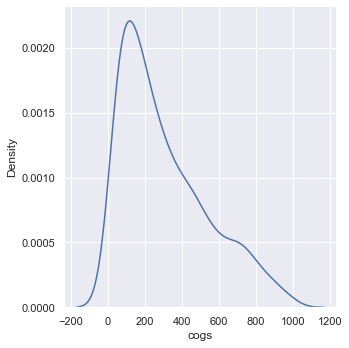

In [18]:
sns.displot(data = supermarket_data, x = "cogs", kind = 'kde')

This displot shows right skewed distribution which has long right tail. So, it shows us positive-skew distribution. Also this distribution have mean to the right of the median.

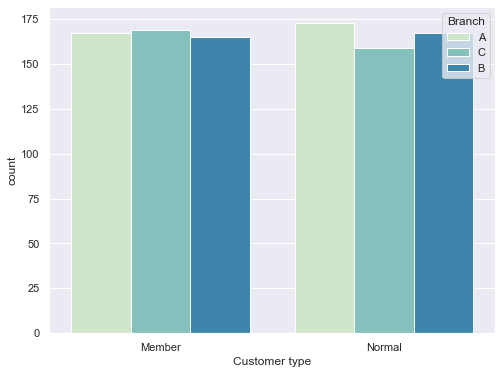

In [19]:
plt.figure(figsize= (8, 6))
sns.countplot(data = supermarket_data, x = "Customer type", 
              hue = "Branch", palette = "GnBu")
plt.show()

The above plot shows us customer types in different branch. And in Normal type A Branch has higher sales and C branch has lowest sales. Similarly,  in Member type C branch has higher sales and B has lowest sales.

### Creating a pie char for Product Line

In [20]:
productLine_names = supermarket_data['Product line'].value_counts().index
productLine_names

Index(['Fashion accessories', 'Food and beverages', 'Electronic accessories',
       'Sports and travel', 'Home and lifestyle', 'Health and beauty'],
      dtype='object')

In [21]:
productLine_values = supermarket_data['Product line'].value_counts().values
productLine_values

array([178, 174, 170, 166, 160, 152], dtype=int64)

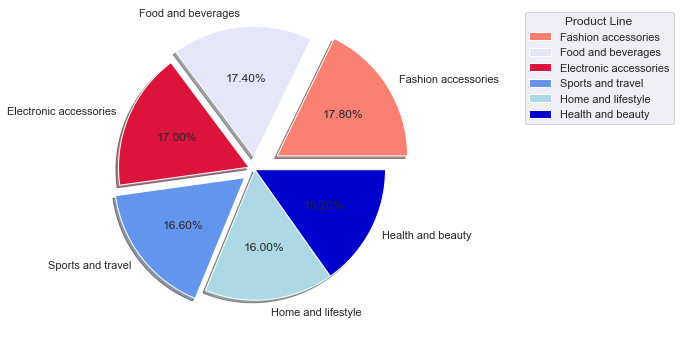

In [22]:
plt.figure(figsize = (8, 6))
colors = ["salmon", "lavender", "crimson", "cornflowerblue", "lightblue", "mediumblue"]

plt.pie(productLine_values, labels= productLine_names, autopct = "%1.2f%%", 
        explode = [0.2, 0.1, 0.05, 0.1, 0.0, 0.0], shadow = True, colors = colors)
plt.legend(bbox_to_anchor =(1, 0, 0.8, 1), title = "Product Line")
plt.show()

Observe the above pie chart 'Fashion accessories', 'Food and beverages' and 'Electronic accessories' products are most brought by the customers. And least number of sales are generating by Health and beauty.

<AxesSubplot:xlabel='Total', ylabel='Density'>

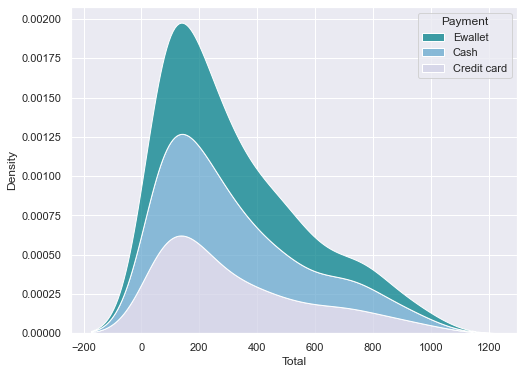

In [23]:
plt.figure(figsize= (8, 6))
sns.kdeplot(data = supermarket_data, x = "Total", hue= "Payment",
             multiple = "stack", palette = "PuBuGn_r")

According to total most of the customers pay through the Ewallet and Cash Payment while under 40 percent of them pay with their credit card.

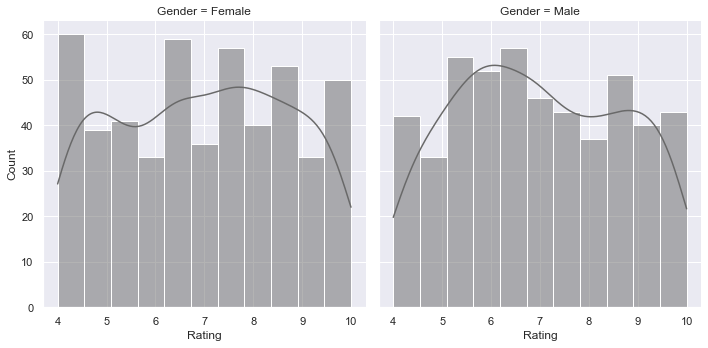

In [24]:
sns.displot(data= supermarket_data, x = "Rating", color = "dimgrey", col = "Gender", kde= True)

The above displot shows the count of rating given by the male and female, where most of the males have given highest rating between 5 to 7 and females have given highest rating between  6 to 8.

<AxesSubplot:xlabel='Product line', ylabel='count'>

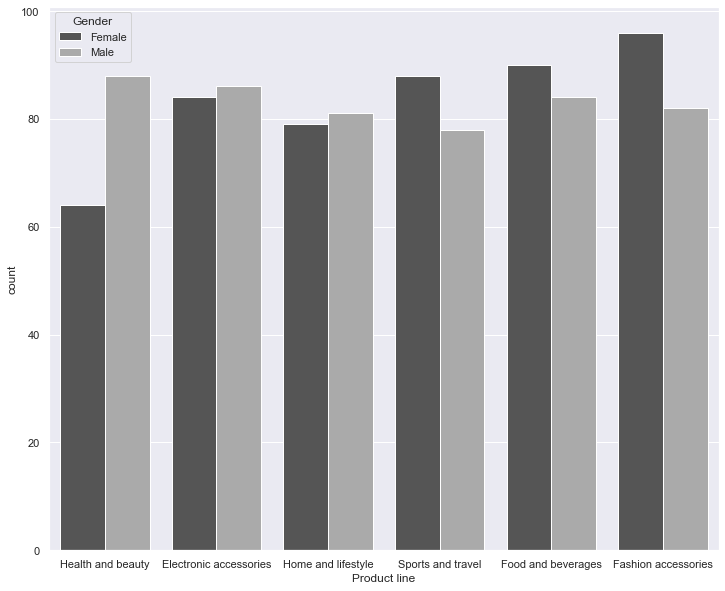

In [25]:
plt.figure(figsize=(12, 10))
sns.countplot(data = supermarket_data, x= "Product line", 
             hue= "Gender", palette="gist_yarg_r")

Females spend on 'fashion accessories' the most and for males it is 'Health and beauty'. Females also spend more on 'Food and beverages'.

# Bivariate analysis

<AxesSubplot:xlabel='Branch', ylabel='Rating'>

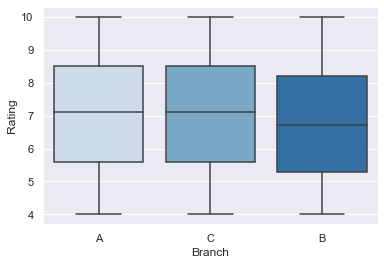

In [26]:
sns.boxplot(data = supermarket_data, x = "Branch", 
            y = "Rating", palette = "Blues")

Above box plot shows that branch B has the lowest rating. 
Also this box plot shows that it is symmetric.

In [27]:
supermarket_data["Branch"].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

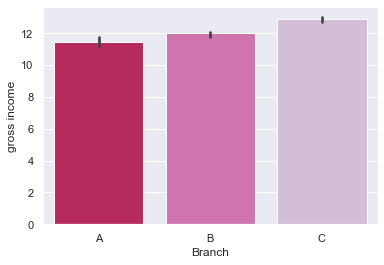

In [28]:
order_1 = ["A", "B", "C"]
sns.barplot(x= supermarket_data["Branch"], y = supermarket_data["gross income"], 
             palette = "PuRd_r", order = order_1, estimator= np.median, ci = 20)
plt.show()

Gross income is highest in Branch C.

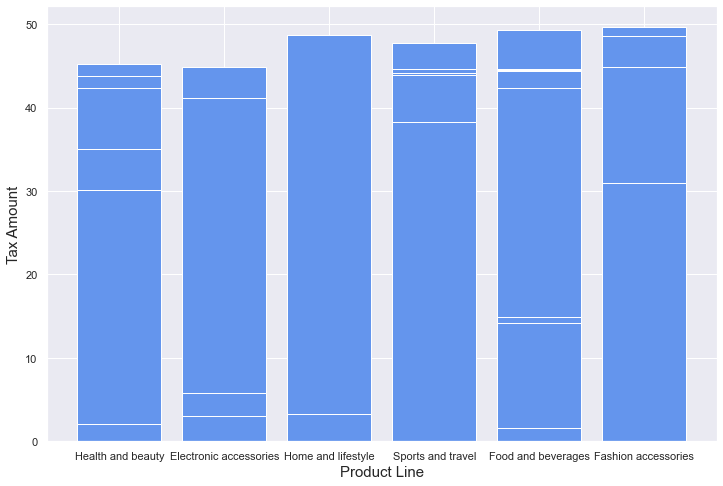

In [29]:
plt.figure(figsize= (12, 8))

x = supermarket_data["Product line"]
y = supermarket_data["Tax 5%"]

plt.xlabel("Product Line", fontsize = 15)
plt.ylabel("Tax Amount", fontsize = 15)

plt.bar(x, y, color = 'cornflowerblue')
plt.show()

'Fashion accessories' and 'Food and beverages' have highest tax percentage of 49% and 48% respectively.

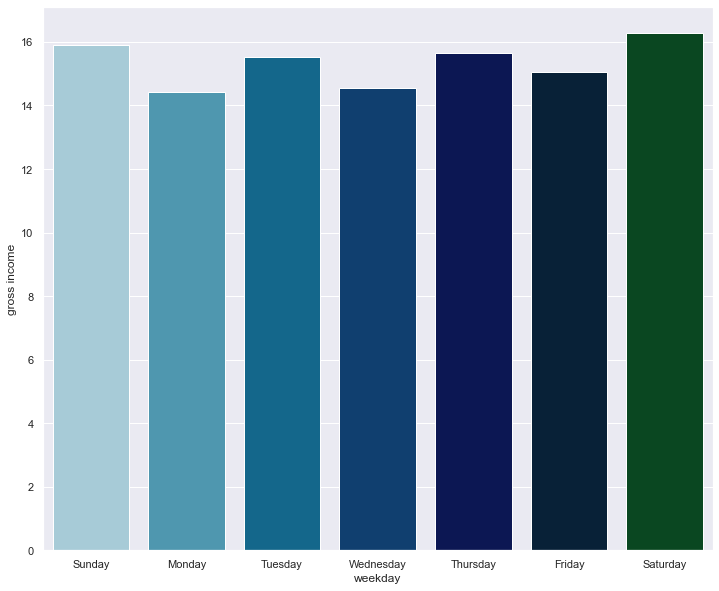

In [30]:
plt.figure(figsize=(12, 10))

order_1 = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

sns.barplot(x= supermarket_data["weekday"], 
            y = supermarket_data["gross income"], 
            errwidth= 0.5, palette="ocean_r", 
            ci= 0, order = order_1)

plt.show()

Gross income is highest on Saturdays probably because it is the weekend. Mondays is the lowest in gross income, probably because it is start of the working week.

In [31]:
supermarket_data["City"].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

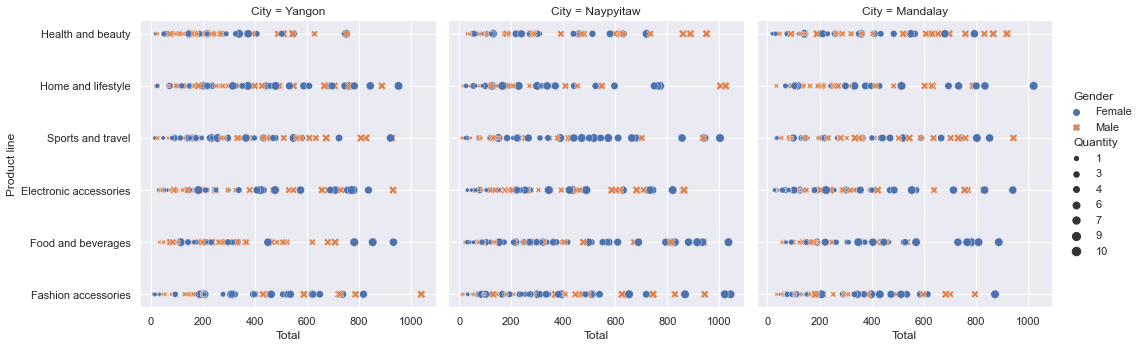

In [32]:
sns.relplot(data = supermarket_data, 
             x = "Total", y = "Product line", 
            col = "City", hue = "Gender",
             style = "Gender", size = "Quantity")

plt.show()

In the above illustrated scatter diagram, it shows observation on purchase pattern of male vs female in three different cities as per the types of product:

1. As per the demography of males in naypyitaw and mandalay, it is observed that males are more interest in buying 'health and beauty' products compared to Yangon city. 

2. Similarly, Females of Yangon and mandalay likes to spend more on 'Home and lifestyle' products than in Naypyitaw city. In general, naypyitaw shows less interest in electronics then in other two cities. 

All in together males shows more spending trend towards 'Health and beauty' though Females likes to spend more on 'Food and beverages'.

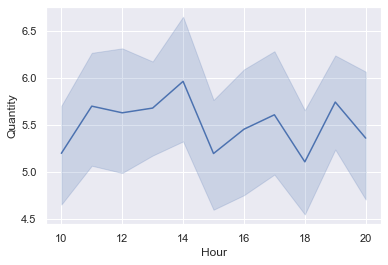

In [33]:
sns.lineplot(data = supermarket_data, x = "Hour", y = "Quantity")
plt.show()

Sales by the hour in the company Most of the item were sold around 14:00 hrs local time.

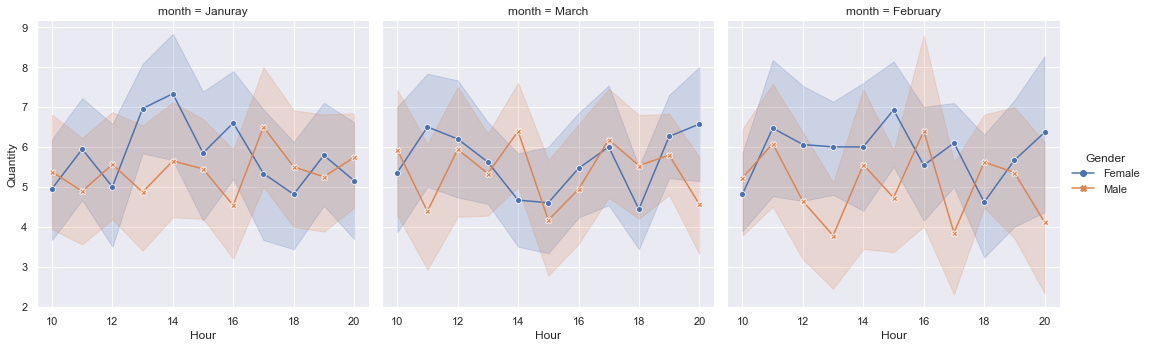

In [34]:
sns.relplot(data = supermarket_data, 
            x = "Hour", y = "Quantity",
            kind = "line", hue = "Gender", 
            style= "Gender", col = "month",
            markers = True, dashes = False)

In this above plot we can see how each sales quantity looks like by the hour in a monthly fashion: 

1. In first month Male and female like to shop around noon but Females have the higher number of transaction at 2pm.And around 5pm male customers shop the most.

2. Similarly, in second month Male and female shop around morning and Female have higher number of transaction at 11 am also at 3pm . And around 10 am and 4pm male shop the most.

3. Lastly, in third month Male and female have higher transaction around 5pm. 

Also, we can infer from every month Female customers like to shop around 10 am to 12pm have the higher number of transaction.

# Correlation  Heatmap

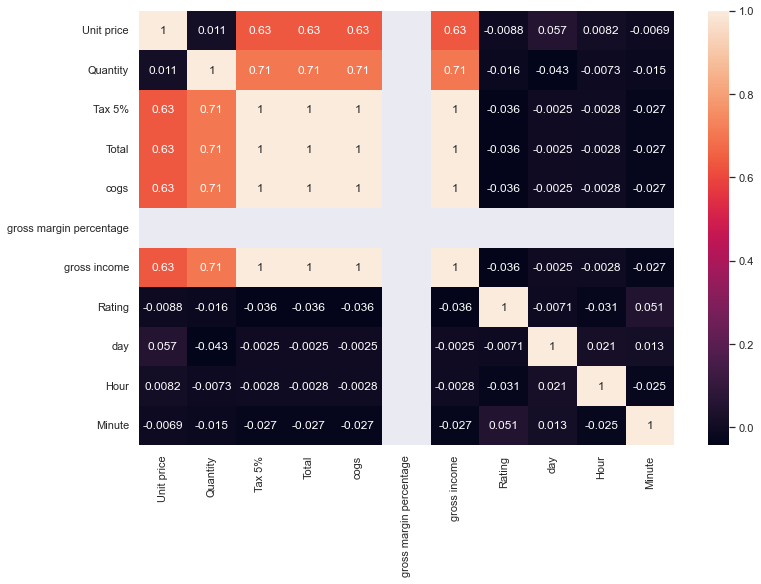

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(supermarket_data.corr(), annot =  True)
plt.show()

In this above correlation the grey bars shows the null values in gross margin percentage vs gross margin percentage.

The orange block shows unit price and quantity is positively correlated to Taxes, Total and cogs with 63% and 71% of correlation respectively. 

And the pale block represents the perfect correlation between values of same column.

# Conclusion:

We have used Univariate , Bivariate and Correlation analysis to perform basic EDA on Supermarket Sales Data. Here is a summary of a few of them:

1. Naypyitaw city which is branch C has the highest number of transactions and Sales.

2. February has the lowest number of sales and January account for the most sales.

3. Fashion accessories and food and beverages are the most sold product in Naypyitaw and these products should be focused on along with electronic accessories.

4. The most popular payment method is E-wallet and cash payment is also on the higher side.

5. Most of the customers buy 10 quantities and busiest time of the day is afternoon i.e. around 2 pm which records highest sales. Sales is higher on Tuesdays and Saturdays compared to the rest of the week.

6. Using the correlation analysis, one interesting observation has emerged that customer ratings is not related to any variable. 